# Advanced plotting

# Topics

* making movies
* customizing plots using matplotlib
* create data suitable for passing to matplotlib

In [1]:
import yt

/Users/goldbaum/Documents/yt-hg/yt/config.py:112: UserWarning: The configuration file /Users/goldbaum/.yt/config is deprecated. Please migrate your config to /Users/goldbaum/.config/yt/ytrc by running: 'yt config migrate'
  warnings.warn(msg.format(_OLD_CONFIG_FILE, CURRENT_CONFIG_FILE))


In [2]:
sim = yt.load('/Users/goldbaum/Documents/test/enzo_cosmology_plus/DD????/DD????')

In [3]:
type(sim)

yt.data_objects.time_series.DatasetSeries

In [4]:
for ds in sim:
    print ds

DD0000
DD0001
DD0002
DD0003
DD0004
DD0005
DD0006
DD0007
DD0008
DD0009
DD0010
DD0011
DD0012
DD0013
DD0014
DD0015
DD0016
DD0017
DD0018
DD0019
DD0020
DD0021
DD0022
DD0023
DD0024
DD0025
DD0026
DD0027
DD0028
DD0029
DD0030
DD0031
DD0032
DD0033
DD0034
DD0035
DD0036
DD0037
DD0038
DD0039
DD0040
DD0041
DD0042
DD0043
DD0044
DD0045
DD0046


In [20]:
for ds in sim[::10]:
    slc = yt.SlicePlot(ds, 'z', 'density')
    slc.set_buff_size((800, 800))
    slc.set_figure_size(8)
    slc.set_zlim('density', 1e-31, 4e-28)
    slc.set_width((32, 'Mpccm/h'))
    slc.hide_axes()
    slc.hide_colorbar()
    fn = slc.save(mpl_kwargs={'dpi':100})[0]
    print fn

DD0000_Slice_z_density.png
DD0010_Slice_z_density.png
DD0020_Slice_z_density.png
DD0030_Slice_z_density.png
DD0040_Slice_z_density.png


FFmpeg commands:

```
# make a gif
ffmpeg -pattern_type glob -i 'DD*.png'  out.gif

# make a mp4
ffmpeg -pattern_type glob -i 'DD*.png'  out.mp4
```

Include as a gif like this:

```
<img src='out.gif'>
```

In [25]:
import io
import base64
from IPython.display import HTML

HTML(data='''
<video alt="test" controls>
<source src="./out.mp4" type="video/mp4" />
</video>''')

In [26]:
import io
import base64
from IPython.display import HTML

video = io.open('out.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

# Customizing plots

In [27]:
slc = yt.SlicePlot(ds, 2, 'density')


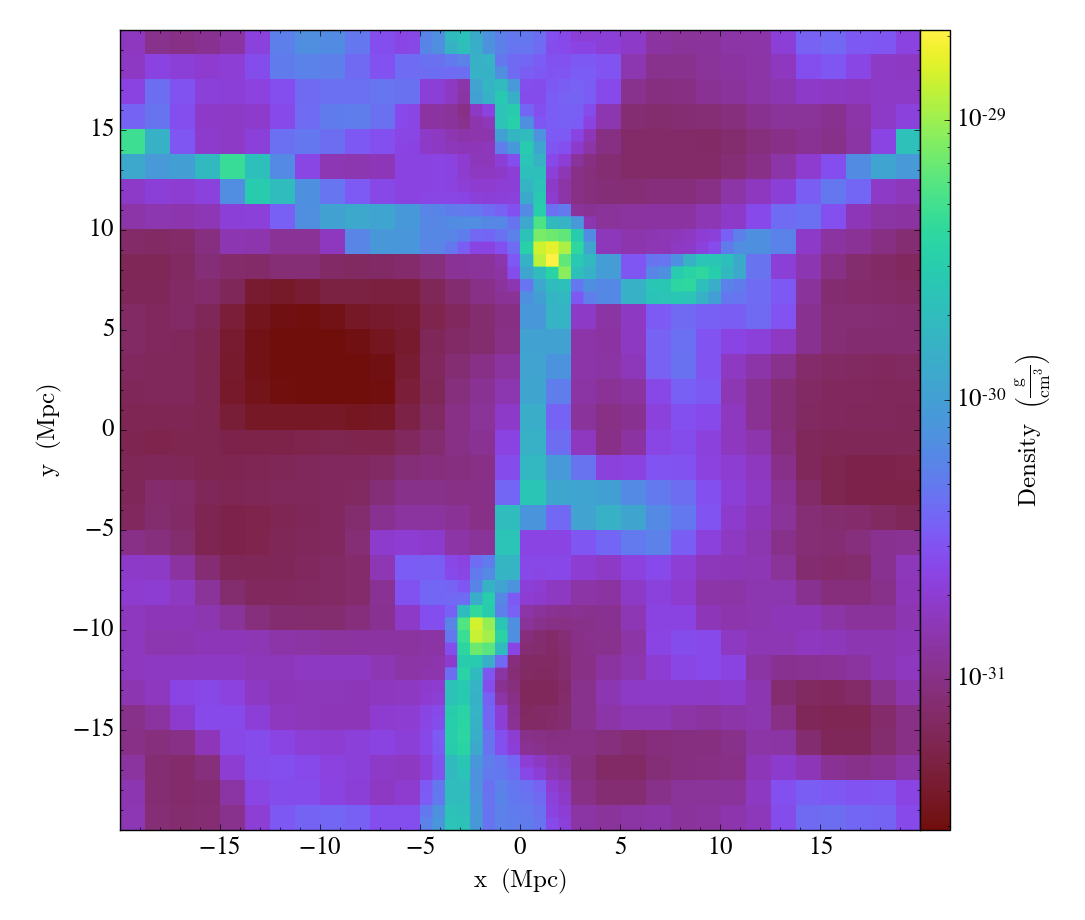

In [28]:
slc

In [29]:
type(slc)

yt.visualization.plot_window.AxisAlignedSlicePlot

In [34]:
plot = slc.plots['density']

In [36]:
figure = plot.figure

In [37]:
figure

In [38]:
%matplotlib inline

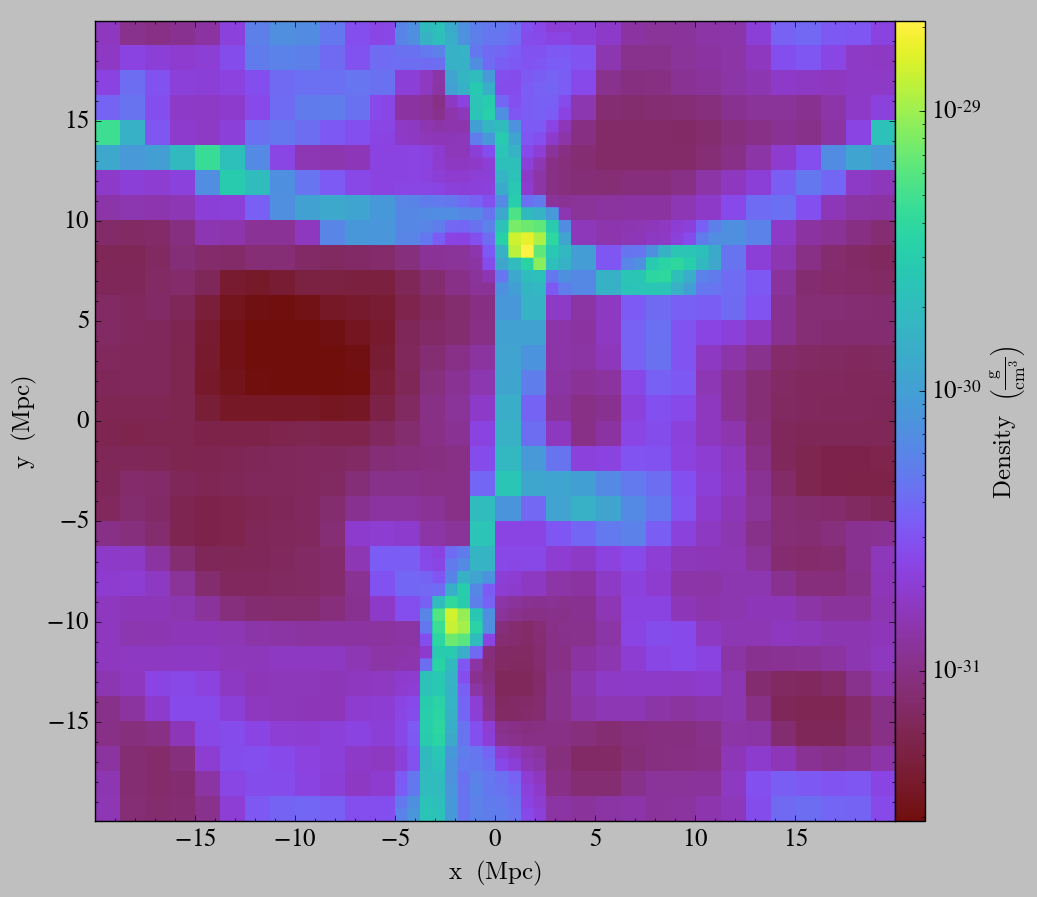

In [39]:
figure

In [40]:
ax = plot.axes

In [42]:
ax.plot([0, 15], [5, 10])


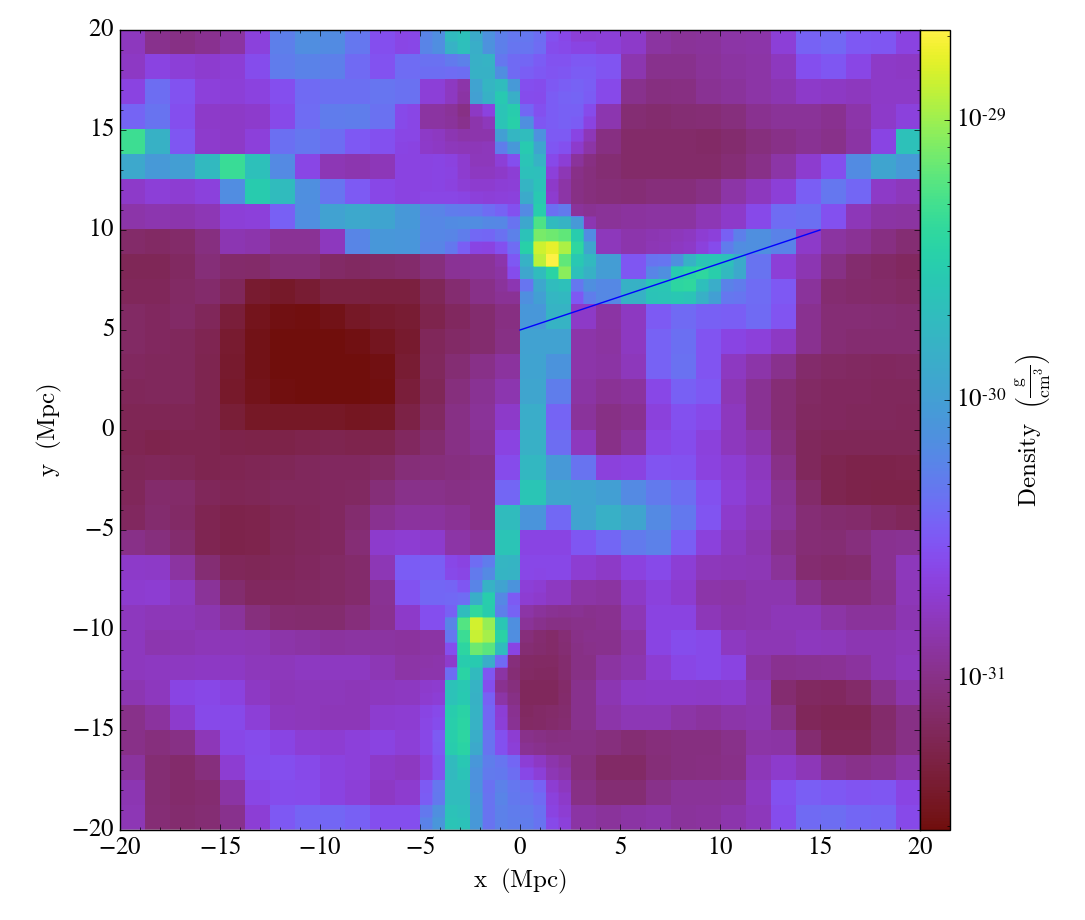

In [43]:
slc

In [44]:
from mpl_toolkits.axes_grid1 import AxesGrid

In [46]:
from matplotlib import pyplot as plt
fig = plt.figure()

In [47]:
grid = AxesGrid(fig, (0.075,0.075,0.85,0.85),
                nrows_ncols = (2, 2),
                axes_pad = 1.0,
                label_mode = "1",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")

In [48]:
fields = ['density', 'velocity_x', 'velocity_y', 'velocity_magnitude']

# Create the plot.  Since SlicePlot accepts a list of fields, we need only
# do this once.
p = yt.SlicePlot(ds, 'z', fields)

# For each plotted field, force the SlicePlot to redraw itself onto the AxesGrid
# axes.
for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

# Finally, redraw the plot on the AxesGrid axes.
p._setup_plots()

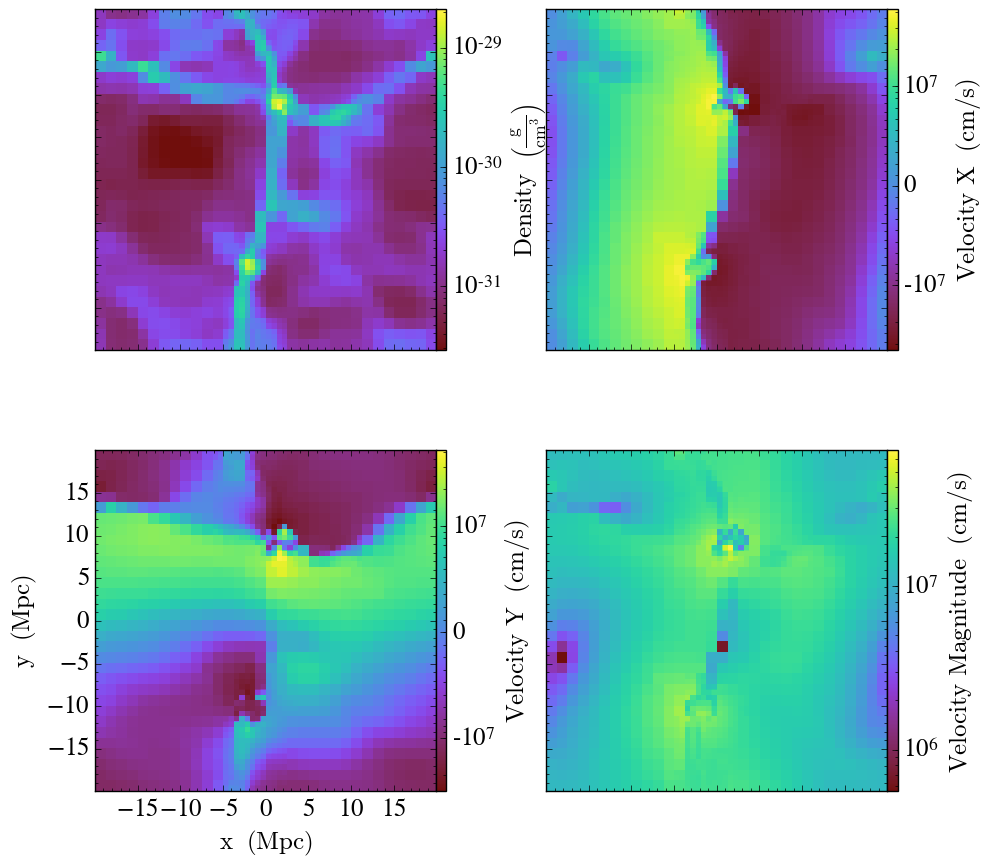

In [49]:
fig

In [50]:
fig.savefig('my_plot.png')

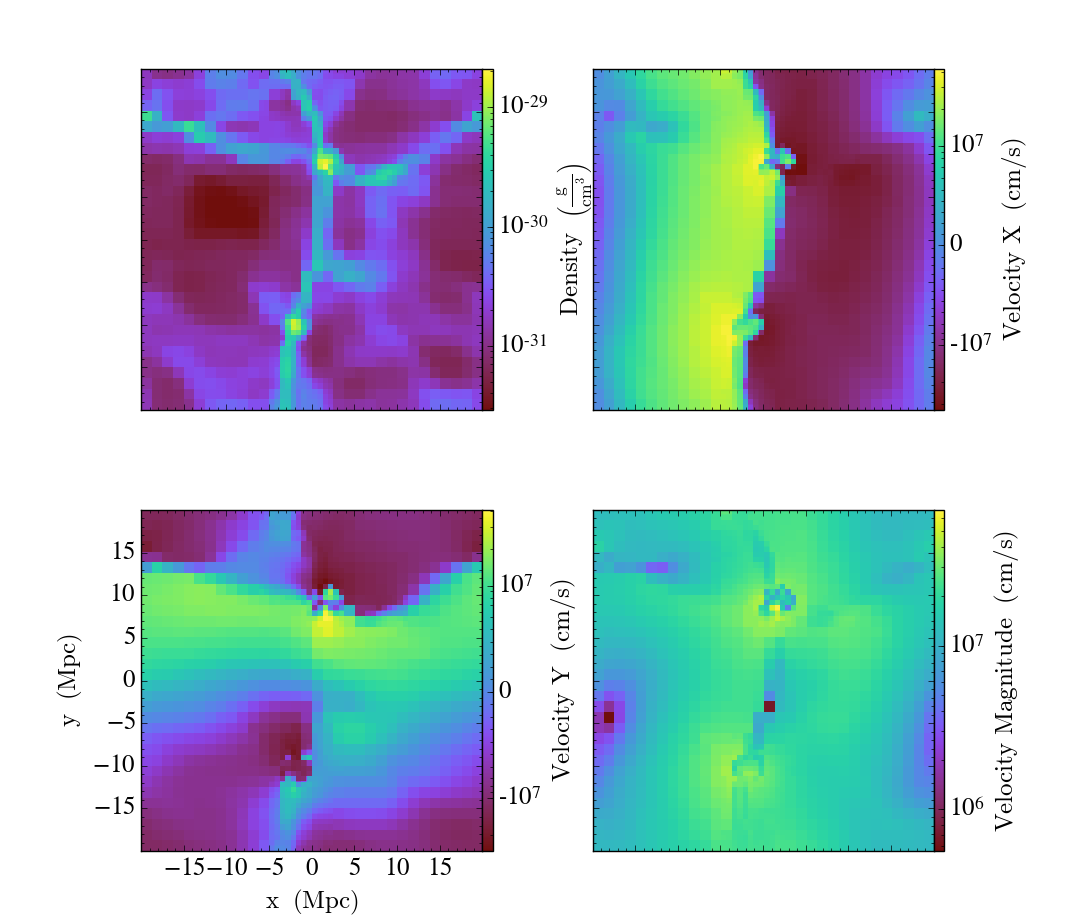

In [51]:
from IPython.display import Image

Image('my_plot.png')

# FixedResolutionBuffer

In [56]:
image = slc.frb['density']

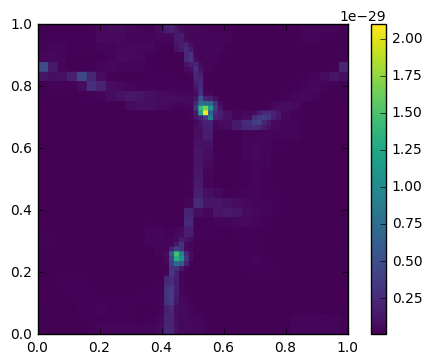

In [64]:
plt.imshow(image, origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.set_cmap('viridis')

In [66]:
import numpy as np
np.array(image)

array([[  1.56155712e-31,   1.56155712e-31,   1.56155712e-31, ...,
          2.58551431e-31,   2.58551431e-31,   2.58551431e-31],
       [  1.56155712e-31,   1.56155712e-31,   1.56155712e-31, ...,
          2.58551431e-31,   2.58551431e-31,   2.58551431e-31],
       [  1.56155712e-31,   1.56155712e-31,   1.56155712e-31, ...,
          2.58551431e-31,   2.58551431e-31,   2.58551431e-31],
       ..., 
       [  1.67725970e-31,   1.67725970e-31,   1.67725970e-31, ...,
          2.38243628e-31,   2.38243628e-31,   2.38243628e-31],
       [  1.67725970e-31,   1.67725970e-31,   1.67725970e-31, ...,
          2.38243628e-31,   2.38243628e-31,   2.38243628e-31],
       [  1.67725970e-31,   1.67725970e-31,   1.67725970e-31, ...,
          2.38243628e-31,   2.38243628e-31,   2.38243628e-31]])

In [67]:
sl = ds.r[0.5, :, :]

In [68]:
sl

YTSlice (DD0040): , axis=0, coord=6.16601975783e+25 cm

In [71]:
frb = sl.to_frb((30, 'Mpc'), 1600)

In [74]:
density_image = frb['density']

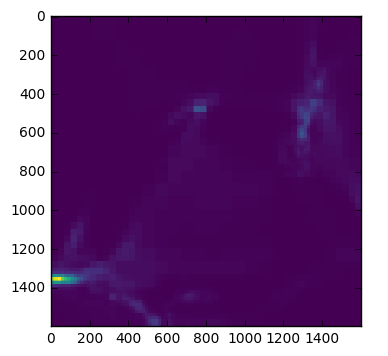

In [75]:
plt.imshow(density_image)


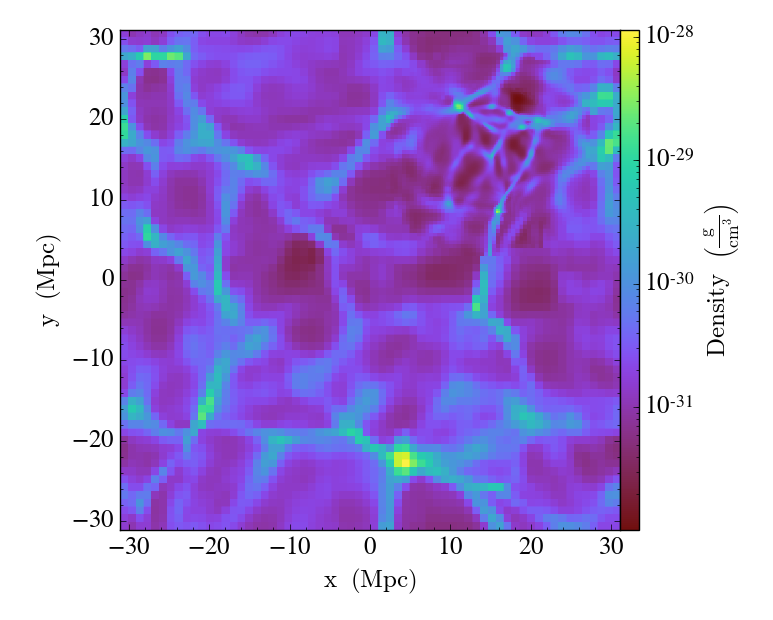

In [78]:
ds = yt.load('output_00080/info_00080.txt')

sl = yt.SlicePlot(ds, 2, 'density', center=[0.5, 0.5, 0.75])
sl.set_figure_size(5)

In [79]:
ds.domain_dimensions

array([64, 64, 64], dtype=int32)

In [80]:
# create covering grid of density at AMR level 0
cgrid = ds.covering_grid(0, left_edge=[0, 0, 0], dims=[64, 64, 64])

In [81]:
density_array = cgrid['density']

In [82]:
density_array.shape

(64, 64, 64)

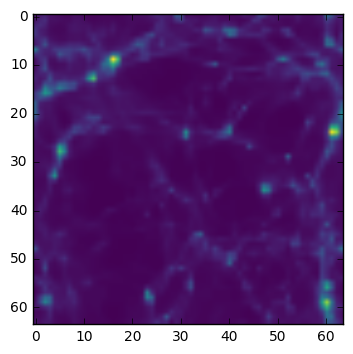

In [84]:
plt.imshow(density_array.sum(axis=1))

In [86]:
density_array.write_hdf5('my_array.h5')

In [87]:
!h5ls my_array.h5

array_data               Dataset {64, 64, 64}


In [88]:
cgrid = ds.smoothed_covering_grid(1, left_edge=[0, 0, 0], dims=[128, 128, 128])

In [89]:
density_array = cgrid['density']

In [91]:
density_array.shape

(128, 128, 128)

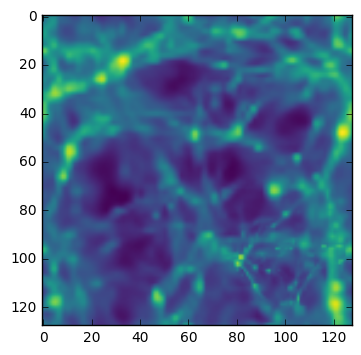

In [92]:
plt.imshow(np.log10(density_array.sum(axis=1)))

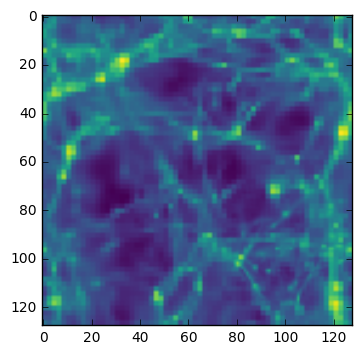

In [93]:
cgrid = ds.covering_grid(1, left_edge=[0, 0, 0], dims=[128, 128, 128])
density_array = cgrid['density']
plt.imshow(np.log10(density_array.sum(axis=1)))